### Imports

In [1]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 3000
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)


### Functions

In [2]:
def query_entry(num_queries):

    """
    Get user input for queries
    """
    query_list = []
    
    i = 0

    for i in range(num_queries):
        query_list.append(input("Please enter keyword for query: "))
        
    return query_list

In [3]:
def num_of_queries():
    
    """
    Get number of queries
    """
    num = int(input("Please enter number of queries to search and compare(max 5): "))

    if num > 5 or num < 0:
        while num > 5 or num < 0:
            num = int(input("Please enter number of queries to search and compare(max 5): "))


    return num
    

### Opens Google.Trends request

In [4]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.3)

master_df = pd.DataFrame()

### Payload Customization Section

In [5]:
# Create payload and capture API tokens. 
# Only needed for interest_over_time(), interest_by_region() & related_queries()
# Up to five terms in a list

# Either start from today and go back up to 5 years, #-(H, d, m, y) for # of Hours, days, months, or years
# OR give a timeframe of two dates in 'YYYY-MM-DD YYYY-MM-DD' format
# If Given a 500 error code, it is Google issue with query, may see request as spam or sketchy code
# OR data is unavailable for timeframe
user_timeframe = 'today 12-m' 

#Country of interest, leave empty for global interest
user_geo = 'US'

user_kw_list = []

num_queries = num_of_queries()

user_kw_list = query_entry(num_queries)

Please enter number of queries to search and compare(max 5): 5
Please enter keyword for query: Chase
Please enter keyword for query: Wells Fargo
Please enter keyword for query: PNC
Please enter keyword for query: Capital One
Please enter keyword for query: CitiBank


### API use

In [6]:
#Builds trend data pull
pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)

### Interest Over Time Comparison

In [7]:
# Interest Over Time
# Google Trends does not relay specific view counts of topics.
# Simply, the numbers correlate to relative virality of a topic,
# where 100 is maximum trend and 0 is minimum trend

# interest over time provides weekly intervals for trend analysis
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

,Chase,Wells Fargo,PNC,Capital One,CitiBank,isPartial
date,,,,,,
2019-06-02,83,84,21,36,13,False
2019-06-09,83,81,21,34,11,False
2019-06-16,82,79,20,35,11,False
2019-06-23,84,82,22,35,12,False
2019-06-30,86,86,22,35,12,False
2019-07-07,83,81,22,35,11,False
2019-07-14,80,80,20,35,12,False
2019-07-21,79,77,20,34,11,False
2019-07-28,87,84,22,52,12,False


### Interest Over Time Plot

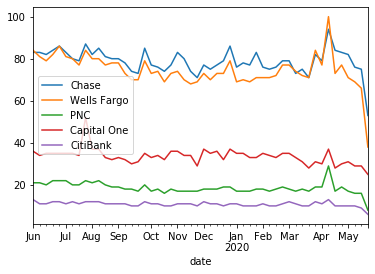

In [8]:
interest_over_time_df.plot()

### Interest by Region

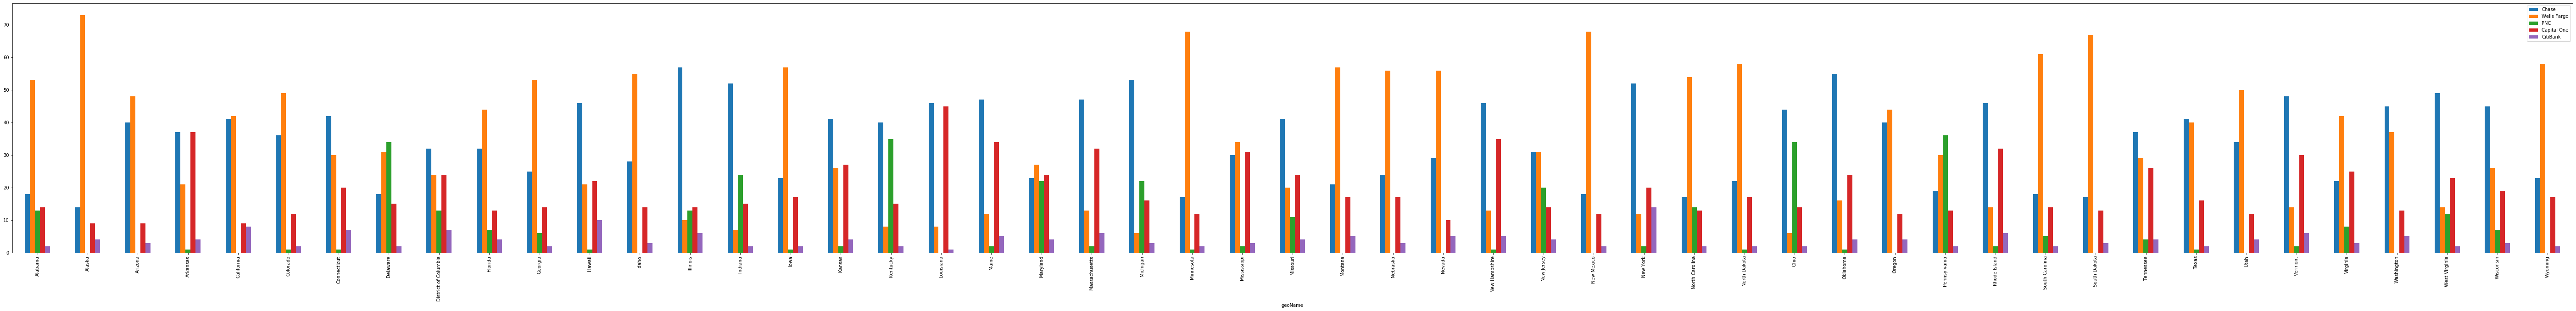

In [9]:
# Interest by Region
# The values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

#Plots interest by region per state within selected timeframe
interest_by_region_df.plot(figsize=(100, 10), kind ='bar')

    

### Related Queries, which requires payload with only one item

In [10]:

# Related Queries, returns a dictionary of dataframes

# For Top, values are calculated on a scale from 0 to 100, 
# where 100 is the location with the most popularity as a fraction of total 
# searches in that location, a value of 50 indicates a location which is half as popular. 
# A value of 0 indicates a location where there was not enough data for this term.

# For Rising, the values are uncertain but may be interpreted as rounded searches for timeframe
# related_query = []

# related_query.append(input("Insert Search Query for Top Related and Rising Related Searches: "))

i = 0
related_list = []
frames_master = pd.DataFrame(related_list)

pytrend.build_payload(kw_list = user_kw_list, timeframe = user_timeframe, geo=user_geo)
    
    # Uses the keyword to find recent trending searches using certain keyword
related_queries_dict = pytrend.related_queries()
for i in range(num_queries):
    #Top List maxes out at 100
    related_top = pd.DataFrame(related_queries_dict[user_kw_list[i]]['top'])
    #Rising List is a percentage increase in searches over preset time period
    related_rising = pd.DataFrame(related_queries_dict[user_kw_list[i]]['rising'])

    related_list.append(related_top)
    related_list.append(related_rising)
    frames_master = pd.concat(related_list, axis=1)

frames_master


,query,value,query,value,query,value,query,value,query,value,query,value,query,value,query,value,query,value,query,value
0,chase bank,100,chase stokes age,16300,wells fargo login,100,wells fargo coronavirus,39050,pnc bank,100,pnc ppp,21700,capital one credit,100,capital one breach 2019,28950,citibank login,100,citibank ppp,19050
1,chase online,50,chase stokes,15950,wells fargo near me,47,wells fargo ppp,16200,pnc online,28,pnc stimulus check,15550,credit one,99,capital one data breach 2019,27850,citibank online,68,citibank paycheck protection program,5900
2,chase card,40,chase rice and victoria,10250,wells fargo bank,47,wells fargo ppp loan,6200,pnc banking,23,pnc ppp loan,8000,capital one card,83,capital one data breach,15400,citibank card,64,citibank online account login,450
3,chase login,33,outer banks,9500,wells fargo online,40,wells fargo payroll protection program,1250,online banking pnc,20,pnc hsa login,400,capital one login,80,capital one breach,7350,citibank credit card,48,citibank online account,300
4,chase credit card,28,outer banks cast,8950,wells fargo number,32,wells fargo auto.com,600,online banking,20,pnc refinance rates,250,capital one credit card,68,capital one savings rate,110,citibank card login,29,citibank accelerate savings,300
5,chase near me,28,chase young stats,4800,wells fargo routing,18,wells fargo refinance rates,550,pnc near me,15,pnc mortgage rates,250,credit card,65,capital one savings account,100,citibank near me,25,citibank hours today,150
6,chase number,17,chase rice and victoria f,4600,routing number wells fargo,17,wells fargo mortgage rates,200,pnc login,14,pnc bank mortgage rates,150,capital one bank,59,capital one mastercard login,100,citibank login credit card,23,best buy citibank login,140
7,chase bank near me,16,john b,4400,wells fargo sign,17,wells fargo auto,120,pnc bank near me,9,pnc lights show,110,capital bank,57,walmart capital one,100,citi,22,citibank mortgage rates,110
8,the chase,16,chase young news,2850,wells fargo account,15,wells fargo rates,110,pnc number,7,pnc pinacle,100,capital one credit login,26,mercury card,100,chase,19,citibank stock price,110
9,chase customer service,10,outer banks netflix,2300,wells fargo mortgage,14,wells fargo auto payment,110,pnc bank login,7,pnc work from home,100,credit one login,26,walmart capital one card,90,citibank number,16,ally bank,100
